In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
merged_df_path = '/content/drive/MyDrive/merged_data.csv'

In [ ]:
merged_df = pd.read_csv(merged_df_path)

In [ ]:
reason_df=pd.read_csv("/content/drive/MyDrive/SkyHack Dataset/reason18315ff (1).csv")

In [ ]:
# Remove punctuation and add space in place of punctuation
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('[^\w\s]', ' ', regex=True)

In [ ]:
# Remove leading and trailing spaces
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.strip()

In [ ]:
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.replace('\s+', ' ', regex=True)

In [ ]:
reason_df['primary_call_reason'] = reason_df['primary_call_reason'].str.lower()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords_and_conjunctions(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

reason_df['primary_call_reason'] = reason_df['primary_call_reason'].apply(remove_stopwords_and_conjunctions)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
call_df = pd.read_csv('/content/drive/MyDrive/SkyHack Dataset/callsData.csv')

In [ ]:
merged_df = call_df.merge(reason_df, on='call_id', how='inner')

#Taking 500 instance from each call reason

In [ ]:

sampled_df = pd.DataFrame(columns=['call_transcript', 'primary_call_reason'])

# Get unique primary call reasons
unique_reasons = merged_df['primary_call_reason'].unique()
print(unique_reasons)
# Sample 500 examples (or all if less than 500) for each reason
for reason in unique_reasons:
    reason_df = merged_df[merged_df['primary_call_reason'] == reason]
    num_samples = min(50, len(reason_df))  # Take 500 or all available
    sampled_reason_df = reason_df.sample(n=num_samples, random_state=42)  # Sample randomly
    desired_columns = ['call_transcript', 'primary_call_reason']
    available_columns = sampled_reason_df.columns.tolist()
    columns_to_select = [col for col in desired_columns if col in available_columns]

    sampled_df = pd.concat([sampled_df, sampled_reason_df[columns_to_select]])

# Reset the index of the sampled DataFrame
sampled_df.reset_index(drop=True, inplace=True)

transcripts = sampled_df['call_transcript'].to_list()  # Use sampled_df
reasons = sampled_df['primary_call_reason'].to_list()  # Use sampled_df


['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'voluntary change' 'post flight' 'check' 'topics'
 'communications' 'schedule change' 'products services' 'digital support'
 'disability' 'unaccompanied minor' 'baggage' 'traveler updates' 'etc']


In [ ]:
save_path = '/content/drive/MyDrive/sampled_data.csv'
sampled_df.to_csv(save_path, index=False)

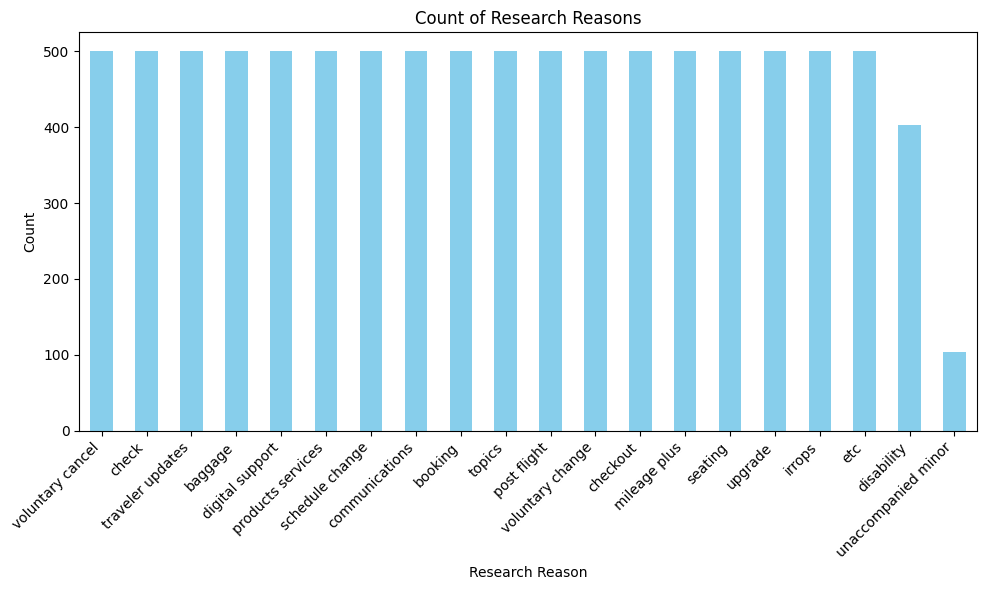

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


rsch_reason_counts = sampled_df['primary_call_reason'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
rsch_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Research Reasons')
plt.xlabel('Research Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()